In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser 

tps = pd.read_csv('../csv/temperatures/temperature_2018.csv', encoding='utf-8', sep=';')
tps.drop(tps.index[(tps["Zone"]!="Lambrate")], axis=0, inplace=True)

tps

#toglie da tutto il csv in corrispondenza di colonna "x" la chiave
#"y"

tps.drop(tps.index[12960:],inplace=True)

tps['Data-Ora'] = pd.to_datetime(tps['Data-Ora'])
tps['Media']=pd.to_numeric(tps['Media'].str.replace(',','.'), errors='coerce')

tps_day_medium=tps.set_index('Data-Ora').groupby(pd.Grouper(freq='D')) #crea un nuovo dataset
tps_day_medium=tps_day_medium['Media'].mean().reset_index().rename(columns={"Data-Ora":"data"})

tps_day_medium
#tps



,data,Media
0,2018-01-01,3.312500
1,2018-01-02,6.391667
2,2018-01-03,-1.258333
3,2018-01-04,13.145833
4,2018-01-05,14.691667
...,...,...
360,2018-12-27,2.066667
361,2018-12-28,3.200000
362,2018-12-29,4.062500
363,2018-12-30,5.854167


In [50]:
inq=pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')
#inq

In [51]:
inq.drop(inq.index[1550:],inplace=True)
inq.drop(inq.index[(inq["inquinante"]!="NO2")], axis=0, inplace=True)
inq.dropna(subset=["valore"], axis=0, inplace=True)
inq.drop(inq.index[(inq["stazione_id"]!=2)], axis=0, inplace=True)
#inq

In [52]:
from datetime import datetime

#inq['data'] = inq['data'].map(lambda x:datetime.strptime(x, '%d/%m/%Y').strftime('%Y-%m-%d'))
inq

,stazione_id,data,inquinante,valore
11,2,2018-01-03,NO2,70.0
36,2,2018-01-04,NO2,72.0
61,2,2018-01-05,NO2,76.0
86,2,2018-01-08,NO2,46.0
111,2,2018-01-09,NO2,38.0
...,...,...,...,...
1436,2,2018-03-26,NO2,100.0
1461,2,2018-03-27,NO2,108.0
1486,2,2018-03-28,NO2,102.0
1511,2,2018-03-29,NO2,71.0


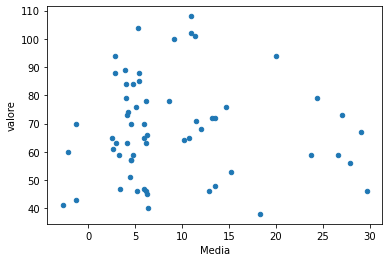

In [61]:
result= inq.set_index('data').join(tps_day_medium.set_index('data'))
#result

result.plot.scatter(x='Media', y='valore')
plt.show()